In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [43]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Covertype.csv')

In [45]:

df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [46]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

As we can see that classes are imbanaced and we have good number of observations for cover type 2 and 1. For cover type 4 and 5, we have less number of observations.

In [47]:
len(df)

581012

In [48]:
X = df.drop('Cover_Type', axis = 1)
y = df['Cover_Type']

In [49]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

Checking null values

In [50]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There is no missing values in the dataset

EDA(Univariate)

In [51]:
df_new = df.filter(['Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'], axis=1)

In [52]:
df_new.head(2)

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,510,221,232,148,6279
1,390,220,235,151,6225


In [53]:
df_new.describe()

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,7117.000000,254.000000,254.000000,254.000000,7173.000000


Text(0, 0.5, 'Hillshade_3pm')

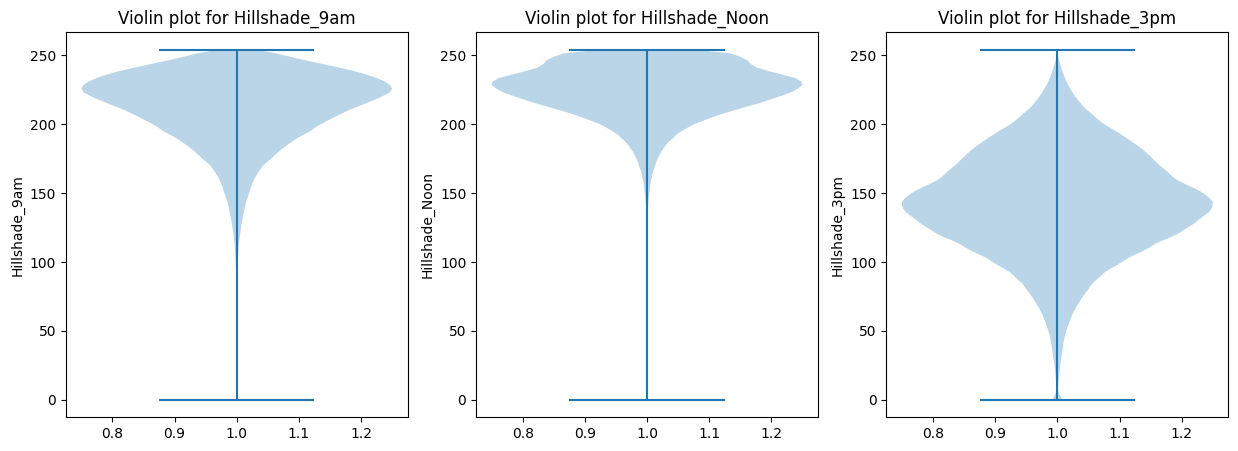

In [54]:

fig,ax = plt.subplots(1,3,figsize = (15,5))

ax[0].violinplot(df_new['Hillshade_9am'])
ax[0].title.set_text('Violin plot for Hillshade_9am')
ax[0].set_ylabel('Hillshade_9am')
ax[1].violinplot(df_new['Hillshade_Noon'])
ax[1].title.set_text('Violin plot for Hillshade_Noon')
ax[1].set_ylabel('Hillshade_Noon')
ax[2].title.set_text('Violin plot for Hillshade_3pm')
ax[2].violinplot(df_new['Hillshade_3pm'])
ax[2].set_ylabel('Hillshade_3pm')

Text(0, 0.5, 'Horizontal_Distance_To_Fire_Points')

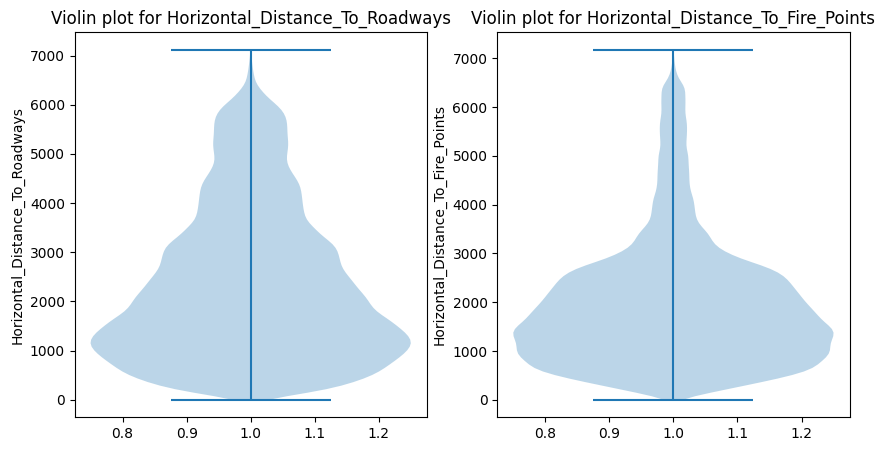

In [55]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize = (10,5))

ax[0].violinplot(df_new['Horizontal_Distance_To_Roadways'])
ax[0].title.set_text('Violin plot for Horizontal_Distance_To_Roadways')
ax[0].set_ylabel('Horizontal_Distance_To_Roadways')
ax[1].violinplot(df_new['Horizontal_Distance_To_Fire_Points'])
ax[1].title.set_text('Violin plot for Horizontal_Distance_To_Fire_Points')
ax[1].set_ylabel('Horizontal_Distance_To_Fire_Points')

Checking collinearity between the numerical features

Method 1

In [56]:
X = add_constant(df_new)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

const                                 550.105967
Horizontal_Distance_To_Roadways         1.168658
Hillshade_9am                          23.324557
Hillshade_Noon                         13.869525
Hillshade_3pm                          35.819750
Horizontal_Distance_To_Fire_Points      1.153801
dtype: float64

Method 2

In [57]:
df_new['Cover_Type'] = df.Cover_Type.values

In [58]:
df_new.head(2)

,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,510,221,232,148,6279,5
1,390,220,235,151,6225,5


In [59]:
c = list(df_new.columns)
c.remove('Cover_Type')
c

['Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [60]:
features = "+".join(c)

# get y and X dataframes based on this regression:
y, X = dmatrices('Cover_Type ~' + features, df_new, return_type='dataframe')

In [61]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [62]:
vif.round(1)

,VIF Factor,features
0,550.1,Intercept
1,1.2,Horizontal_Distance_To_Roadways
2,23.3,Hillshade_9am
3,13.9,Hillshade_Noon
4,35.8,Hillshade_3pm
5,1.2,Horizontal_Distance_To_Fire_Points


Hillshade features is having same variance so we can keep one of the feature.

**Soil type mapping**

Based on the soil hierarchy, we can classify the the all 40 soil types to main order in soil hierarchy.
Based on that, we are able to classify the features into 7 different soil order types.

In [63]:
soil_orders = pd.read_excel('/content/Soil orders according to family.xlsx')

In [64]:
soil_orders.head()

,Soil,Family,Description,Unnamed: 3,Type,Quality,Subgroup,Order,Unnamed: 8,Unnamed: 9
0,Soil_Type1,Cathedral family,"Rock outcrop complex, extremely stony.",NaN,NaN,NaN,Lithic Haplustolls,Mollisols,NaN,NaN
1,Soil_Type2,Vanet,"Ratake families complex, very stony.",NaN,NaN,NaN,Calcidic Haplustalfs,Alfisols,NaN,NaN
2,Soil_Type5,Vanet,"Rock outcrop complex complex, rubbly.",NaN,NaN,NaN,Calcidic Haplustalfs,Alfisols,NaN,NaN
3,Soil_Type6,Vanet,"Wetmore families - Rock outcrop complex, stony.",NaN,NaN,NaN,Calcidic Haplustalfs,Alfisols,NaN,NaN
4,Soil_Type3,Haploborolis,"Rock outcrop complex, rubbly.",NaN,NaN,NaN,NaN,Mollisols,NaN,NaN


In [65]:
soil_orders.Order.value_counts()

Inceptisols    17
Mollisols       9
Alfisols        5
Spodosols       5
Entisols        2
Unknown         1
Histosols       1
Name: Order, dtype: int64

In [66]:
df[['Inceptisols','Mollisols','Spodosols','Alfisols','Entisols','Unknown','Histosols']] = 0

In [67]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

**Using the soil order mapping, classifying 40 soil types into 7 main soil orders.**



In [68]:
for i in range(0, len(df)):
  mol = ['Soil_Type1','Soil_Type3','Soil_Type4','Soil_Type7','Soil_Type8','Soil_Type1','Soil_Type14','Soil_Type16','Soil_Type17','Soil_Type18']
  alf = ['Soil_Type2','Soil_Type5','Soil_Type6','Soil_Type9','Soil_Type26']
  ent = ['Soil_Type12','Soil_Type34']
  hist = ['Soil_Type19']
  enc = ['Soil_Type10','Soil_Type11','Soil_Type32','Soil_Type28','Soil_Type13','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type33','Soil_Type27','Soil_Type25','Soil_Type38','Soil_Type31','Soil_Type29','Soil_Type30']
  spod = ['Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type39','Soil_Type40']
  Unknown = ['Soil_Type15']
  flag = 0

  if i%50000 == 0:
    print(i)

  for x1 in mol:
    if df[x1][i]== 1:
      df['Mollisols'][i] = 1
      flag = 1
      break
      
  if flag == 1:
    next
  
  for x1 in alf:
    if df[x1][i]== 1:
      df['Alfisols'][i] = 1
      flag = 1
      break

  if flag == 1:
    next

  for x1 in ent:
    if df[x1][i]== 1:
      df['Entisols'][i] = 1
      flag = 1
      break

  if flag == 1:
    next

  for x1 in hist:
    if df[x1][i]== 1:
      df['Histosols'][i] = 1
      flag = 1
      break

  if flag == 1:
    next

  for x1 in enc:
    if df[x1][i]== 1:
      df['Inceptisols'][i] = 1
      flag = 1
      break
  
  if flag == 1:
    next

  for x1 in spod:
    if df[x1][i]== 1:
      df['Spodosols'][i] = 1
      flag = 1
      break

  if flag == 1:
    next

  for x1 in Unknown:
    if df[x1][i]== 1:
      df['Unknown'][i] = 1
      break


0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000


In [69]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type39,Soil_Type40,Cover_Type,Inceptisols,Mollisols,Spodosols,Alfisols,Entisols,Unknown,Histosols
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,1,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,1,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,0,0,0,0,1,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,2,1,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,5,1,0,0,0,0,0,0


In [70]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [71]:
updated_df = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'Inceptisols', 'Mollisols',
       'Spodosols', 'Alfisols', 'Entisols', 'Unknown', 'Histosols']]

In [72]:
updated_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Wilderness_Area3,Wilderness_Area4,Cover_Type,Inceptisols,Mollisols,Spodosols,Alfisols,Entisols,Unknown,Histosols
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,5,1,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,5,1,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,2,0,0,0,0,1,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,2,1,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,5,1,0,0,0,0,0,0


2. Finding most impacting feature:
Some of the soil types are contributing more in some of the forest cover types.
Those features are really strong to classify the cover types.

In [73]:
df[df['Histosols'] == 1].groupby(['Cover_Type'])['Histosols'].count()

Cover_Type
1    2461
2    1490
5      67
7       3
Name: Histosols, dtype: int64

In [74]:
soil_contri = pd.DataFrame(data = {'Cover_Type':[1,2,3,4,5,6,7]})

In [75]:
soil_contri

,Cover_Type
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [76]:
df[df['Soil_Type2']==1].groupby(['Cover_Type'])['Soil_Type2'].count().rename("Soil_Type2").transform(lambda x: (x/x.sum())*100).reset_index()

,Cover_Type,Soil_Type2
0,2,11.322259
1,3,66.325581
2,4,1.528239
3,5,3.508306
4,6,17.315615


In [77]:
col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']

for i in col:
  soil_contri = soil_contri.merge(df[df[i]==1].groupby(['Cover_Type'])[i].count().rename(i).reset_index(), on='Cover_Type', how='left')

In [78]:
pd.set_option('display.max_columns', None)
soil_contri

,Cover_Type,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,NaN,NaN,NaN,182,NaN,NaN,NaN,43.0,161.0,956.0,747.0,2693.0,2197.0,NaN,NaN,636.0,214.0,70.0,2461.0,3717.0,804.0,25783.0,35557.0,11164.0,125.0,283.0,604.0,43.0,41911.0,7644.0,11863.0,21358.0,18148.0,94.0,931.0,14.0,NaN,8729.0,7882.0,4826.0
1,2,NaN,852.0,1191.0,3251,NaN,912.0,105.0,136.0,986.0,10803.0,9077.0,27278.0,13258.0,NaN,NaN,1743.0,957.0,1659.0,1490.0,5207.0,21.0,7442.0,20761.0,9702.0,349.0,2174.0,451.0,891.0,71399.0,20218.0,13209.0,29556.0,25308.0,1431.0,12.0,42.0,NaN,740.0,358.0,332.0
2,3,2101.0,4991.0,2411.0,7501,967.0,3993.0,NaN,NaN,NaN,11532.0,1353.0,NaN,41.0,116.0,NaN,129.0,506.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,178.0,115.0,1018.0,168,48.0,320.0,NaN,NaN,NaN,224.0,34.0,NaN,NaN,155.0,NaN,51.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,264.0,NaN,585,NaN,NaN,NaN,NaN,NaN,260.0,681.0,NaN,1315.0,NaN,NaN,35.0,600.0,170.0,67.0,53.0,NaN,NaN,699.0,70.0,NaN,132.0,NaN,12.0,1132.0,2111.0,309.0,460.0,518.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,752.0,1303.0,203.0,631,582.0,1350.0,NaN,NaN,NaN,8859.0,518.0,NaN,614.0,328.0,3.0,251.0,709.0,NaN,NaN,280.0,NaN,NaN,29.0,138.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,200.0,539.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,13.0,148.0,706.0,204.0,NaN,NaN,31.0,NaN,805.0,197.0,222.0,839.0,636.0,51.0,948.0,63.0,298.0,6104.0,5566.0,3592.0


category wise soil distribution

In [79]:
df['Cover_Type'].value_counts().reset_index().rename(columns = {'index':'Cover_Type','Cover_Type':'Total_count'})

,Cover_Type,Total_count
0,2,283301
1,1,211840
2,3,35754
3,7,20510
4,6,17367
5,5,9493
6,4,2747


In [80]:
 soil_contri = soil_contri.merge(df['Cover_Type'].value_counts().reset_index().rename(columns = {'index':'Cover_Type','Cover_Type':'Total_count'}), on='Cover_Type', how='left')

In [81]:
soil_contri.head()

,Cover_Type,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Total_count
0,1,NaN,NaN,NaN,182,NaN,NaN,NaN,43.0,161.0,956.0,747.0,2693.0,2197.0,NaN,NaN,636.0,214.0,70.0,2461.0,3717.0,804.0,25783.0,35557.0,11164.0,125.0,283.0,604.0,43.0,41911.0,7644.0,11863.0,21358.0,18148.0,94.0,931.0,14.0,NaN,8729.0,7882.0,4826.0,211840
1,2,NaN,852.0,1191.0,3251,NaN,912.0,105.0,136.0,986.0,10803.0,9077.0,27278.0,13258.0,NaN,NaN,1743.0,957.0,1659.0,1490.0,5207.0,21.0,7442.0,20761.0,9702.0,349.0,2174.0,451.0,891.0,71399.0,20218.0,13209.0,29556.0,25308.0,1431.0,12.0,42.0,NaN,740.0,358.0,332.0,283301
2,3,2101.0,4991.0,2411.0,7501,967.0,3993.0,NaN,NaN,NaN,11532.0,1353.0,NaN,41.0,116.0,NaN,129.0,506.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35754
3,4,178.0,115.0,1018.0,168,48.0,320.0,NaN,NaN,NaN,224.0,34.0,NaN,NaN,155.0,NaN,51.0,436.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2747
4,5,NaN,264.0,NaN,585,NaN,NaN,NaN,NaN,NaN,260.0,681.0,NaN,1315.0,NaN,NaN,35.0,600.0,170.0,67.0,53.0,NaN,NaN,699.0,70.0,NaN,132.0,NaN,12.0,1132.0,2111.0,309.0,460.0,518.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,9493


In [82]:
def my_func(x,a):
    try:
        return ((x[a]) / (x['Total_count']))* 100
    except (ZeroDivisionError, ValueError):
        return 0

col = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
for i in col:
  soil_contri[i] = my_func(soil_contri,i)

In [83]:
soil_contri

,Cover_Type,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Total_count
0,1,NaN,NaN,NaN,0.085914,NaN,NaN,NaN,0.020298,0.076001,0.451284,0.352625,1.271242,1.037103,NaN,NaN,0.300227,0.101020,0.033044,1.161726,1.754626,0.379532,12.170978,16.784838,5.270015,0.059007,0.133591,0.285121,0.020298,19.784271,3.608384,5.599981,10.082137,8.566843,0.044373,0.439483,0.006609,NaN,4.120563,3.720733,2.278134,211840
1,2,NaN,0.300740,0.420401,1.147543,NaN,0.321919,0.037063,0.048005,0.348040,3.813259,3.204013,9.628628,4.679828,NaN,NaN,0.615247,0.337803,0.585596,0.525942,1.837974,0.007413,2.626888,7.328248,3.424626,0.123191,0.767382,0.159195,0.314506,25.202523,7.136579,4.662532,10.432720,8.933255,0.505116,0.004236,0.014825,NaN,0.261206,0.126367,0.117190,283301
2,3,5.876266,13.959277,6.743301,20.979471,2.704592,11.167981,NaN,NaN,NaN,32.253734,3.784192,NaN,0.114672,0.324439,NaN,0.360799,1.415226,NaN,NaN,0.005594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296470,0.013984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35754
3,4,6.479796,4.186385,37.058609,6.115763,1.747361,11.649072,NaN,NaN,NaN,8.154350,1.237714,NaN,NaN,5.642519,NaN,1.856571,15.871860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2747
4,5,NaN,2.780997,NaN,6.162435,NaN,NaN,NaN,NaN,NaN,2.738860,7.173707,NaN,13.852312,NaN,NaN,0.368693,6.320447,1.790793,0.705783,0.558306,NaN,NaN,7.363320,0.737385,NaN,1.390498,NaN,0.126409,11.924576,22.237438,3.255030,4.845676,5.456652,0.210682,NaN,NaN,NaN,NaN,NaN,NaN,9493
5,6,4.330051,7.502735,1.168884,3.633328,3.351183,7.773363,NaN,NaN,NaN,51.010537,2.982668,NaN,3.535441,1.888639,0.017274,1.445270,4.082455,NaN,NaN,1.612253,NaN,NaN,0.166983,0.794610,NaN,NaN,NaN,NaN,NaN,NaN,0.362757,1.151609,3.103587,0.086371,NaN,NaN,NaN,NaN,NaN,NaN,17367
6,7,NaN,NaN,NaN,0.380302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029254,NaN,NaN,NaN,NaN,NaN,0.014627,NaN,0.063384,0.721599,3.442223,0.994637,NaN,NaN,0.151146,NaN,3.924915,0.960507,1.082399,4.090687,3.100926,0.248659,4.622136,0.307167,1.45295,29.761092,27.137981,17.513408,20510


<Figure size 5000x5000 with 0 Axes>

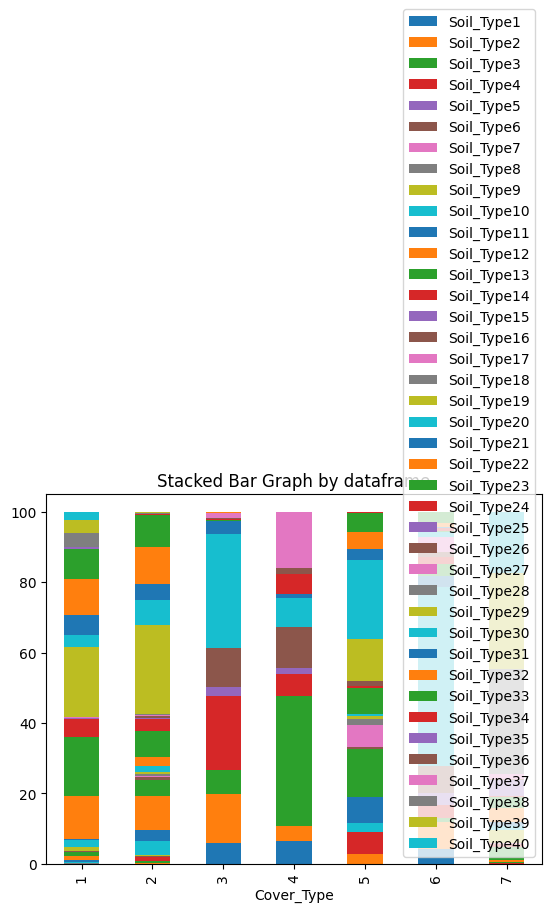

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
k = soil_contri.drop(['Total_count'], axis = 1).plot(x='Cover_Type', kind='bar', stacked=True,title='Stacked Bar Graph by dataframe')
plt.show()

In [85]:
maxValues = soil_contri.drop(['Cover_Type','Total_count'],axis = 1).max(axis=1)

In [86]:
maxValues

0    19.784271
1    25.202523
2    32.253734
3    37.058609
4    22.237438
5    51.010537
6    29.761092
dtype: float64

In [87]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [88]:
wild_area = pd.DataFrame(data = {'Cover_Type':[1,2,3,4,5,6,7]})

In [89]:
df[df['Wilderness_Area1'] == 1].groupby(['Cover_Type'])['Wilderness_Area1'].count().rename("Wilderness_Area1")

Cover_Type
1    105717
2    146197
5      3781
7      5101
Name: Wilderness_Area1, dtype: int64

In [90]:
col = ['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

for i in col:
  wild_area = wild_area.merge(df[df[i]==1].groupby(['Cover_Type'])[i].count().rename(i).reset_index(), on='Cover_Type', how='left')

In [91]:
wild_area

,Cover_Type,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,1,105717.0,18595.0,87528.0,NaN
1,2,146197.0,8985.0,125093.0,3026.0
2,3,NaN,NaN,14300.0,21454.0
3,4,NaN,NaN,NaN,2747.0
4,5,3781.0,NaN,5712.0,NaN
5,6,NaN,NaN,7626.0,9741.0
6,7,5101.0,2304.0,13105.0,NaN


In [92]:
c = wild_area.T.reset_index()

In [93]:
c.columns = c.iloc[0]


In [94]:
c= c.drop(0)

<Axes: title={'center': 'Stacked Bar Graph by dataframe'}, xlabel='Cover_Type'>

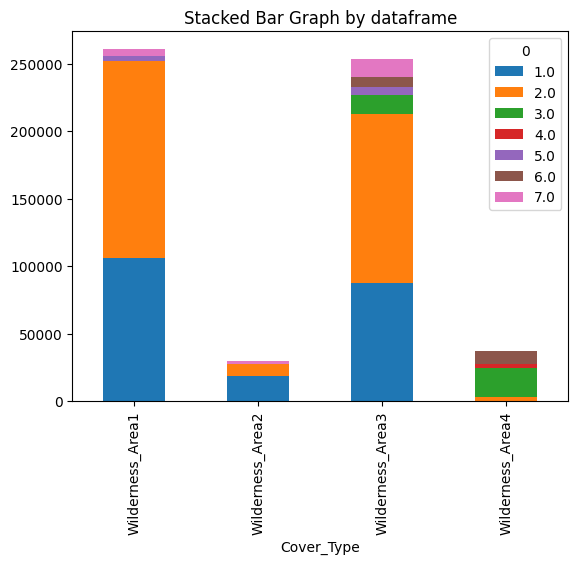

In [95]:
c.plot(x='Cover_Type', kind='bar', stacked=True,title='Stacked Bar Graph by dataframe')

In [96]:
num_df = df.iloc[:,[*range(0,10)] + [54]]
num_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3
581008,2391,152,19,67,12,95,240,237,119,845,3
581009,2386,159,17,60,7,90,236,241,130,854,3
581010,2384,170,15,60,5,90,230,245,143,864,3


#working on this part with better color palette

In [ ]:
# sns.color_palette("hls", 7)
# sns.pairplot(num_df,hue = 'Cover_Type') #palette='tab10'

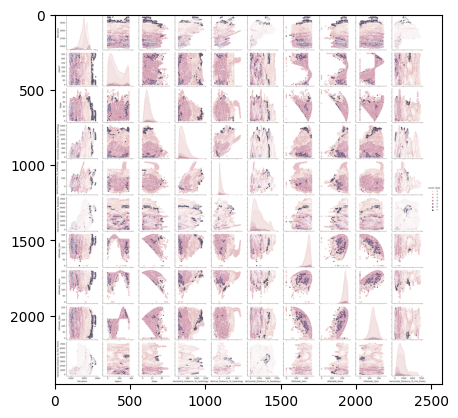

In [110]:
from PIL import Image

# Open the image file
img = Image.open('/content/Untitled.png')

# Display the image using Matplotlib
plt.imshow(img)
plt.show()

In [107]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

<Axes: xlabel='Horizontal_Distance_To_Roadways', ylabel='Density'>

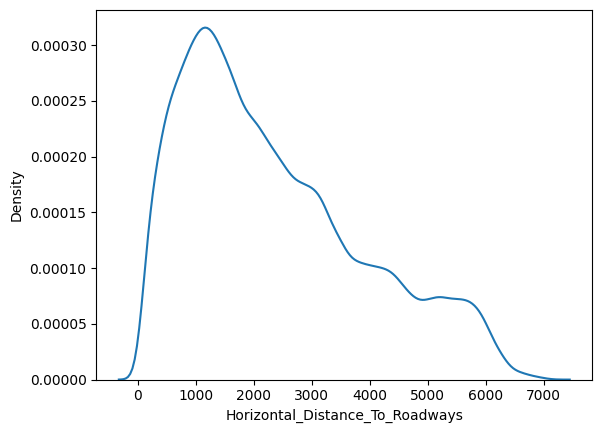

In [108]:
sns.kdeplot(df['Horizontal_Distance_To_Roadways'])

As it is right skewed and value range is high, we will use log tranformation to make it normal

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Horizontal_Distance_To_Roadways', ylabel='Density'>

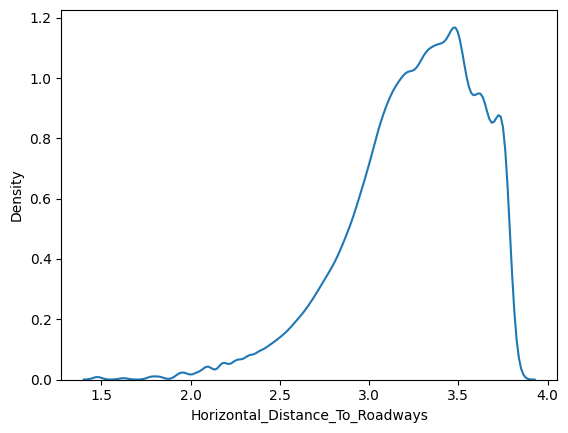

In [109]:
k = df['Horizontal_Distance_To_Roadways']
sns.kdeplot(np.log10(k))

<Axes: xlabel='Horizontal_Distance_To_Fire_Points', ylabel='Density'>

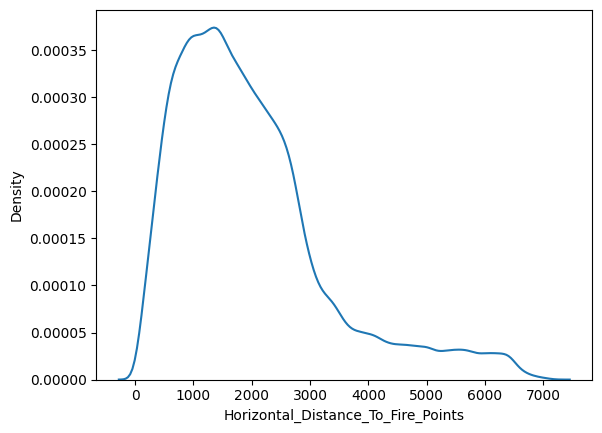

In [39]:
sns.kdeplot(df['Horizontal_Distance_To_Fire_Points'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Horizontal_Distance_To_Fire_Points', ylabel='Density'>

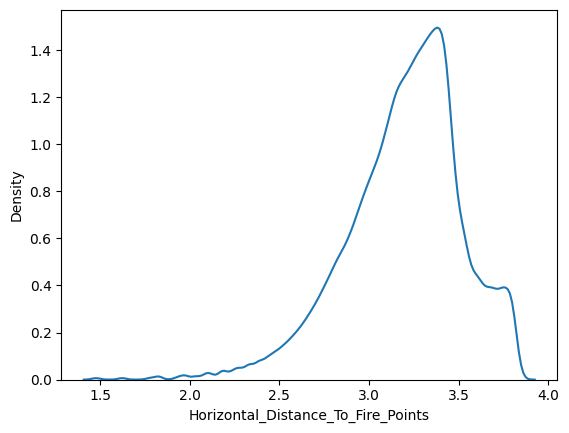

In [40]:
sns.kdeplot(np.log10(df['Horizontal_Distance_To_Fire_Points']))

In [100]:
df.to_csv('cover_type_updated_soil features.csv')